# Imports and definitions

In [1]:
import pandas as pd
import math
import itertools

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def createDataFrame(filename, delimiter):
    return pd.read_csv(filename, sep=delimiter, error_bad_lines=False, encoding='utf8')

def checkNumber(var1):
    if (math.isnan(var1)) | (var1 == 0):
        return None
    return var1

def toPercent(array):
    maxValue = max(array)
    returnArray = []
    for i in range(0, len(array)):
        if array[i] is not None:
            returnArray.append(array[i] / maxValue * 100)
        else:
            returnArray.append(None)
    return returnArray

def checkNan(number):
    if math.isnan(number):
        return 0
    else: return number


# create imdbdataframe

In [2]:
imdbFrame = createDataFrame('movie_metadata.csv', ',')
print imdbFrame

                 color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Sing

# create dataframe from 2 csv documents

In [3]:
movieLensLinks = createDataFrame('ml-latest-small/links.csv', ',')
imdbIds = imdbFrame['movie_imdb_link'].str.extract('(?P<imdbId>\d{7})', expand=True).astype(int)
imdbFrame = pd.concat([imdbFrame, imdbIds], axis=1)
mergeFrame = pd.merge(imdbFrame, movieLensLinks, left_on = 'imdbId', right_on = 'imdbId')
movieLensRatings = createDataFrame('ml-latest-small/ratings.csv', ',')
mergeFrame = pd.merge(movieLensRatings, mergeFrame, left_on = 'movieId', right_on = 'movieId')
mergeFrame

,userId,movieId,rating,timestamp,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbId,tmdbId
0,1,1061,3.0,1260759182,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
1,19,1061,3.0,855190382,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
2,23,1061,3.5,1148673456,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
3,30,1061,3.0,946162006,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
4,70,1061,5.0,853955020,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
5,73,1061,4.0,1255947496,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
6,90,1061,4.0,875517306,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
7,102,1061,2.0,957894450,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
8,105,1061,4.0,1085579876,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0
9,119,1061,4.0,952583272,Black and White,Barry Levinson,73.0,147.0,272.0,893.0,...,USA,R,44000000.0,1996.0,11000.0,7.5,2.35,0,117665,819.0


In [4]:
# movieLensLinks = createDataFrame('../ml-latest/links.csv', ',')
# imdbIds = imdbFrame['movie_imdb_link'].str.extract('(?P<imdbId>\d{7})', expand=True).astype(int)
# # #voeg id's toe aan imdbFrame als nieuwe kolom
# imdbFrame = pd.concat([imdbFrame, imdbIds], axis=1)
# #join movielens db met imdbId
# mergeFrame = pd.merge(imdbFrame, movieLensLinks, left_on = 'imdbId', right_on = 'imdbId')

# #haal ratings data op en join met imdbFrame
# #dit kan wel even duren # gebruik latest-small voor developement
# movieLensRatings = createDataFrame('../ml-latest/ratings.csv', ',')
# mergeFrame = pd.merge(movieLensRatings, mergeFrame, left_on = 'movieId', right_on = 'movieId')
# mergeFrame

,userId,movieId,rating,timestamp,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbId,tmdbId
0,1,122,2.0,945544824,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
1,45,122,1.0,834582571,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
2,103,122,3.0,837605227,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
3,135,122,3.0,830881533,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
4,159,122,4.0,862157372,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
5,206,122,3.0,835885732,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
6,225,122,3.0,1048681311,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
7,282,122,3.0,1000811651,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
8,303,122,3.0,1017732985,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0
9,618,122,2.5,1129687713,Color,Reginald Hudlin,21.0,117.0,71.0,547.0,...,USA,R,40000000.0,1992.0,558.0,5.4,1.85,0,103859,11066.0


# Worst Movies

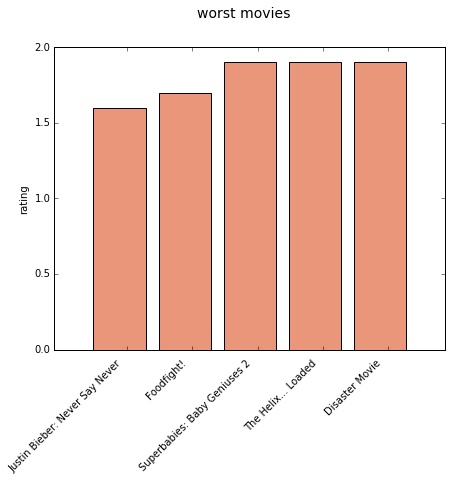

In [6]:
worstmovies = imdbFrame.sort_values(by='imdb_score', ascending=True).head(5);

x_axis = [i+1 for i in range(len(worstmovies))]
y_axis = []

for i in range(len(worstmovies)):
    try:
        var1 = worstmovies.iloc[i]['imdb_score']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('worst movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')

plt.subplots_adjust(bottom=0.3)
h = plt.bar(xrange(5), y_axis, fc='darksalmon', align='center')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, worstmovies['movie_title'],  ha='right', rotation=45)
plt.show()

# Best Movies

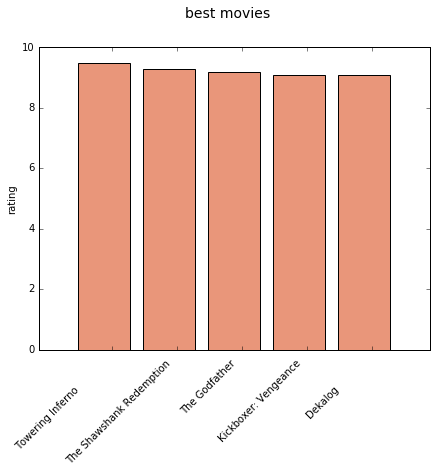

In [7]:
bestmovies = imdbFrame.sort_values(by='imdb_score', ascending=False).head(5);

x_axis = [i+1 for i in range(len(bestmovies))]
y_axis = []

for i in range(len(bestmovies)):
    try:
        var1 = bestmovies.iloc[i]['imdb_score']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('best movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')

plt.subplots_adjust(bottom=0.3)
h = plt.bar(xrange(5), y_axis, fc='darksalmon', align='center')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, bestmovies['movie_title'], ha='right', rotation=45)
plt.show()

# Most Liked Movie

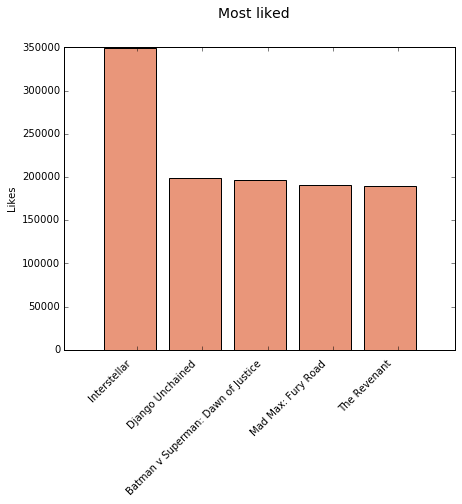

In [8]:
moviesFacebookLikes = imdbFrame.sort_values(by='movie_facebook_likes', ascending=False).head(5);

x_axis = [i+1 for i in range(len(moviesFacebookLikes))]
y_axis = []

for i in range(len(moviesFacebookLikes)):
    try:
        var1 = moviesFacebookLikes.iloc[i]['movie_facebook_likes']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Most liked', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('Likes')

plt.subplots_adjust(bottom=0.3)
h = plt.bar(xrange(5), y_axis, fc='darksalmon', align='center')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, moviesFacebookLikes['movie_title'],  ha='right', rotation=45)
plt.show()

# Languages

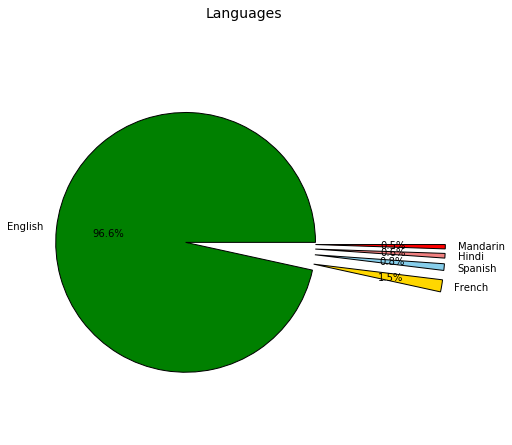

In [9]:
langCount = imdbFrame.groupby('language').size().reset_index(name='count').sort_values(by='count',ascending=False).head(5)
#print langCount
labels = []
sizes = []

for i in langCount['language']:
    labels.append(i)

for i in langCount['count']:
    sizes.append(i)

colors = ['green', 'gold', 'skyblue', 'lightcoral', 'red']
explode = (0, 1, 1, 1, 1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Languages', fontsize=14)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=0)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

# Most liked Directors

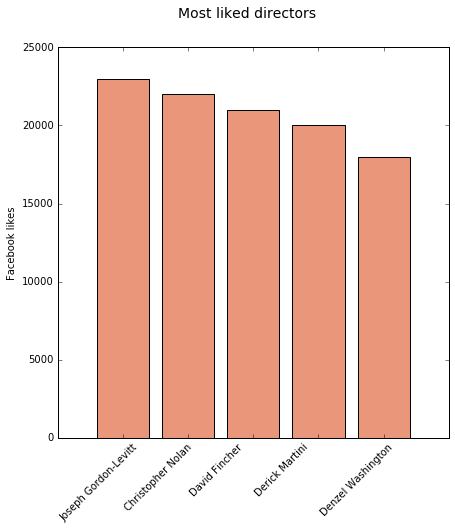

In [10]:
directorLikesNames = imdbFrame[['director_facebook_likes', 'director_name']].drop_duplicates();
directorLikesNames = directorLikesNames.sort_values(by='director_facebook_likes', ascending=False).head(5);

x_axis = np.arange(len(directorLikesNames))
y_axis = []

for i in range(len(directorLikesNames)):
    try:
        var1 = directorLikesNames.iloc[i]['director_facebook_likes']
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Most liked directors', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('Facebook likes')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')

ax.set_xticklabels((directorLikesNames['director_name']), rotation=45, ha='left')
plt.show()

# Most liked Actors

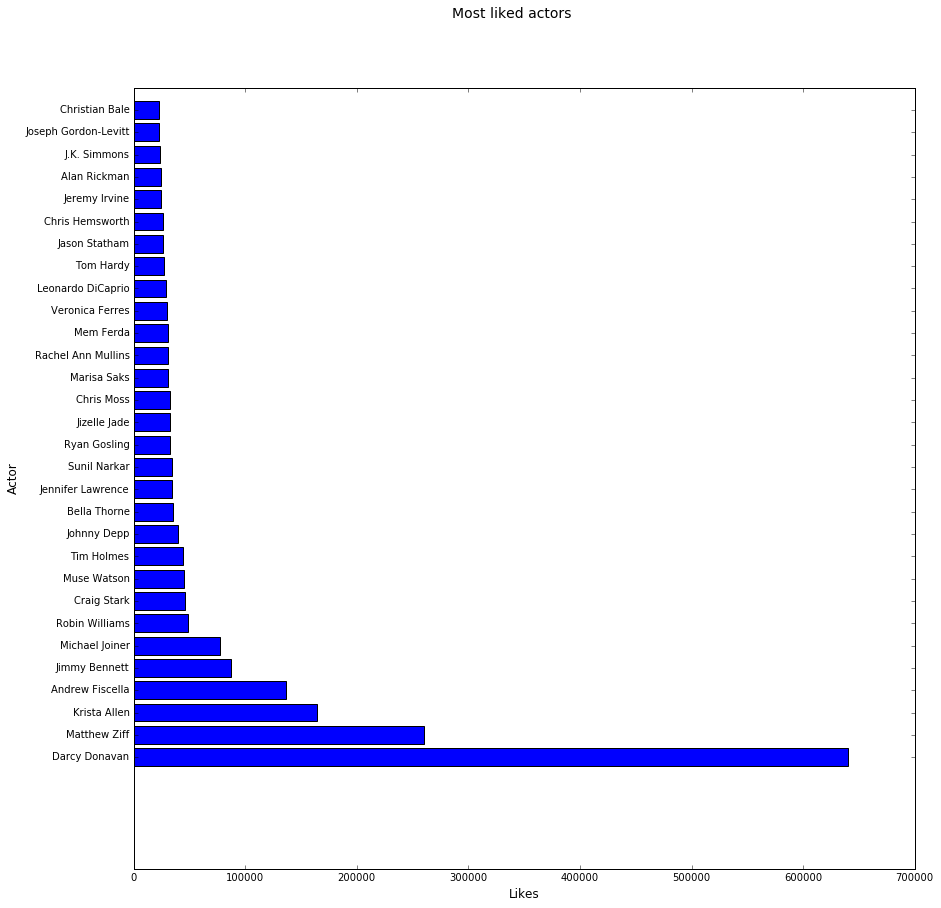

In [11]:
actors = []
actors1 = imdbFrame['actor_1_name']
actors2 = imdbFrame['actor_2_name']
actors3 = imdbFrame['actor_3_name']
actorsIt = itertools.chain(actors1,actors2,actors3)
for i in actorsIt:
    actors.append(i)
#print actors

likes = []
likes1 = imdbFrame['actor_1_facebook_likes']
likes2 = imdbFrame['actor_2_facebook_likes']
likes3 = imdbFrame['actor_3_facebook_likes']
likesIt = itertools.chain(likes1,likes2,likes3)
for i in likesIt:
    likes.append(i)

actorLikes = []
actorLikes = zip(actors,likes)

actorLikes_df = pd.DataFrame(actorLikes, columns=['actors', 'facebook_likes']).drop_duplicates()
# print df.sort_values(by='facebook_likes', ascending=False)

actorFacebookLikes = []
actorFacebookLikes = actorLikes_df.sort_values(by='facebook_likes', ascending=False).head(30)

x_axis = []
y_axis = np.arange(len(actorFacebookLikes))

for i in range(len(actorFacebookLikes)):
    try:
        var1 = actorFacebookLikes.iloc[i]['facebook_likes']
        x_axis.append(var1)
    except:
        x_axis.append(0)
        
fig = plt.figure(figsize=(14,14))
fig.suptitle('Most liked actors', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Actor', fontsize=12)
ax.barh(y_axis, x_axis, align='center')
ax.set_yticks(y_axis)
ax.set_yticklabels(actorFacebookLikes['actors'], rotation=0)
 
plt.show()

# Correlatie IMDB-score - Director likes

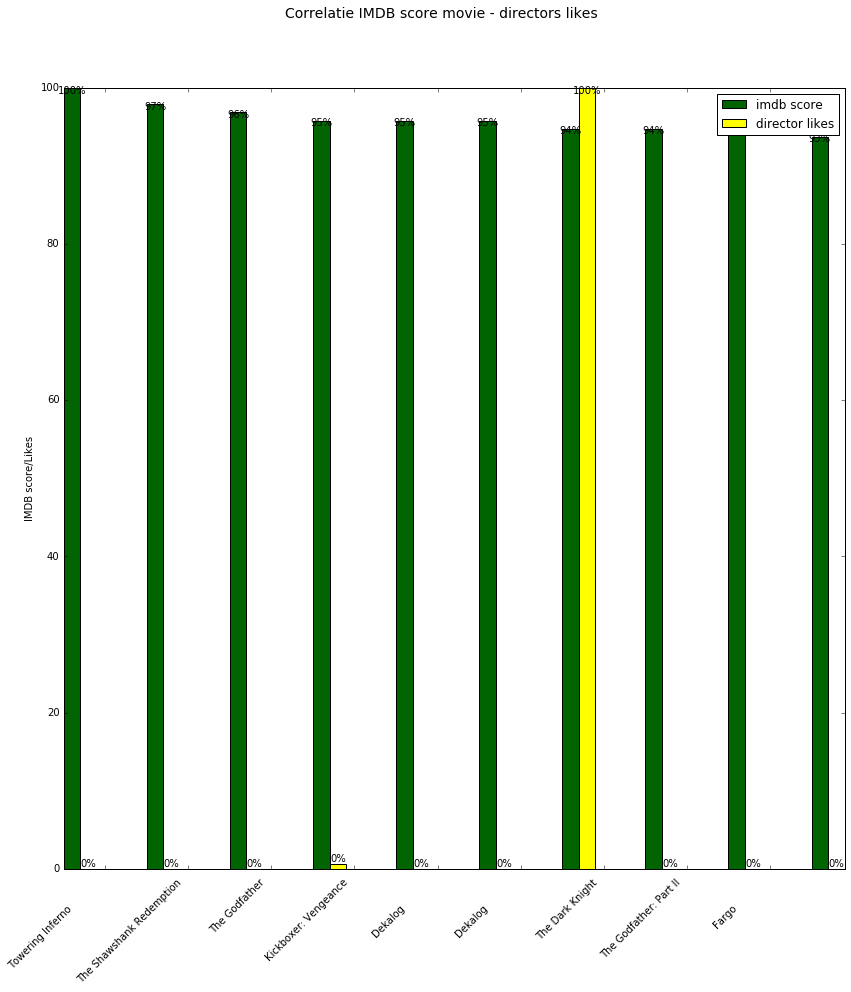

In [12]:
ds = imdbFrame.sort_values(by='imdb_score', ascending=False).head(10)
#print ds['movie_title']
ind = np.arange(len(ds))
width = 0.2

imdbScore = ds['imdb_score'].values
directorLikes = ds['director_facebook_likes'].values

imdbScore = toPercent(imdbScore)
directorLikes = toPercent(directorLikes)

fig = plt.figure(figsize=(14,14))
fig.suptitle('Correlatie IMDB score movie - directors likes', fontsize=14)
ax = fig.add_subplot(111)
rects1 = ax.bar(ind - width, imdbScore, width, color='darkgreen', align='center')
rects2 = ax.bar(ind, directorLikes, width, color='yellow', align='center')


# add some text for labels, title and axes ticks
ax.set_ylabel('IMDB score/Likes')
ax.set_xticks(ind + width)
ax.set_xticklabels(ds['movie_title'], rotation=45, ha='right')
ax.autoscale(tight=True)

ax.legend((rects1[0], rects2[0]), ('imdb score', 'director likes'))

for rect in rects1:
    height = rect.get_height()
    height = checkNan(height)
        
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
#     print height
    height = checkNan(height)
    
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    



plt.show()

# Correlatie IMDB-score - Actor likes

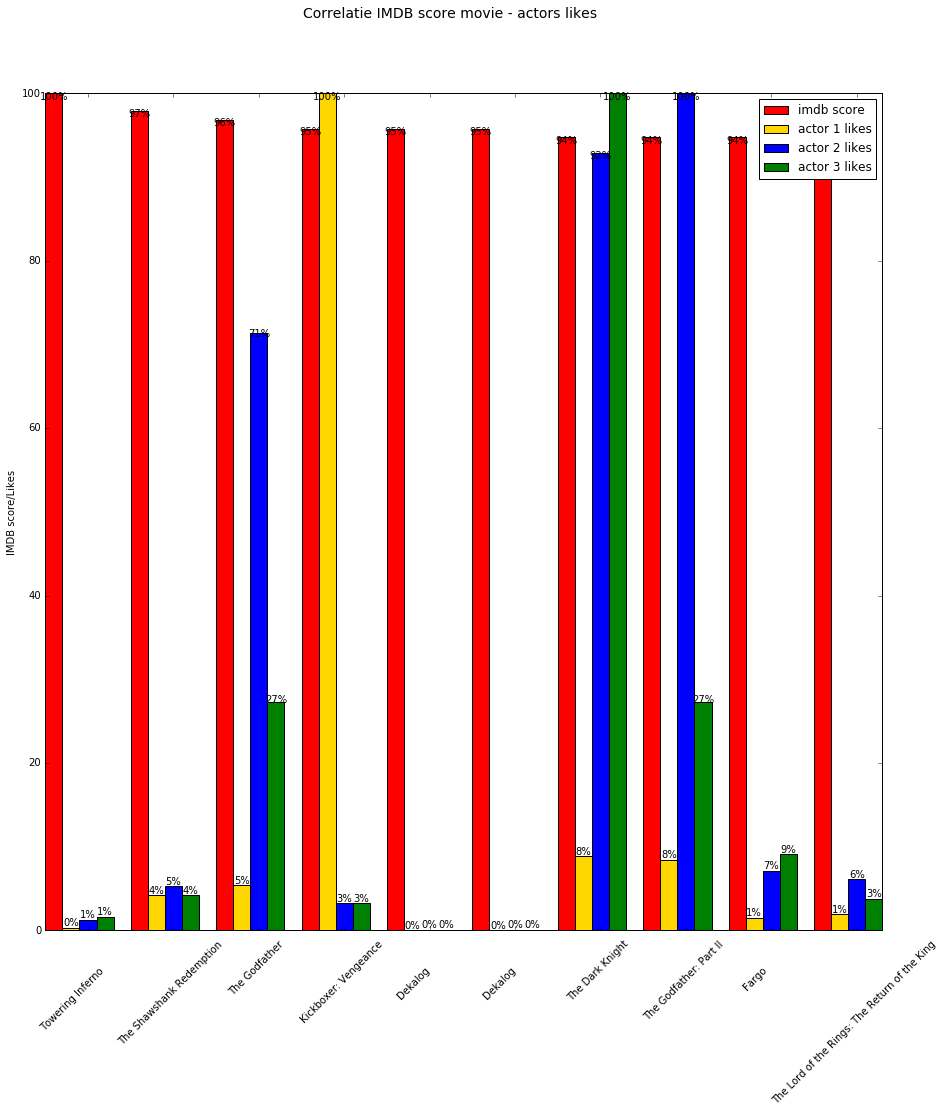

In [13]:
ds = imdbFrame.sort_values(by='imdb_score', ascending=False).head(10)
ind = np.arange(len(ds))
width = 0.2

imdbScore = ds['imdb_score'].values
actor1Likes = ds['actor_1_facebook_likes'].values
actor2Likes = ds['actor_2_facebook_likes'].values
actor3Likes = ds['actor_3_facebook_likes'].values

imdbScore = toPercent(imdbScore)
actor1Likes = toPercent(actor1Likes)
actor2Likes = toPercent(actor2Likes)
actor3Likes = toPercent(actor3Likes)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Correlatie IMDB score movie - actors likes', fontsize=14)
ax = fig.add_subplot(111)
rects1 = ax.bar(ind - width, imdbScore, width, color='r', align='center')
rects2 = ax.bar(ind, actor1Likes, width, color='gold', align='center')
rects3 = ax.bar(ind + width, actor2Likes, width, color='b', align='center')
rects4 = ax.bar(ind + 2*width, actor3Likes, width, color='g', align='center')

# add some text for labels, title and axes ticks
ax.set_ylabel('IMDB score/Likes')
ax.set_xticks(ind + width)
ax.set_xticklabels(ds['movie_title'], rotation=45)
ax.autoscale(tight=True)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('imdb score', 'actor 1 likes', 'actor 2 likes', 'actor 3 likes'))

for rect in rects1:
    height = rect.get_height()
    height = checkNan(height)
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    height = checkNan(height)
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects3:
    height = rect.get_height()
    height = checkNan(height)
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
    
for rect in rects4:
    height = rect.get_height()
    height = checkNan(height)
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')


plt.show()

# Correlatie Aantal movies - IMDB-score

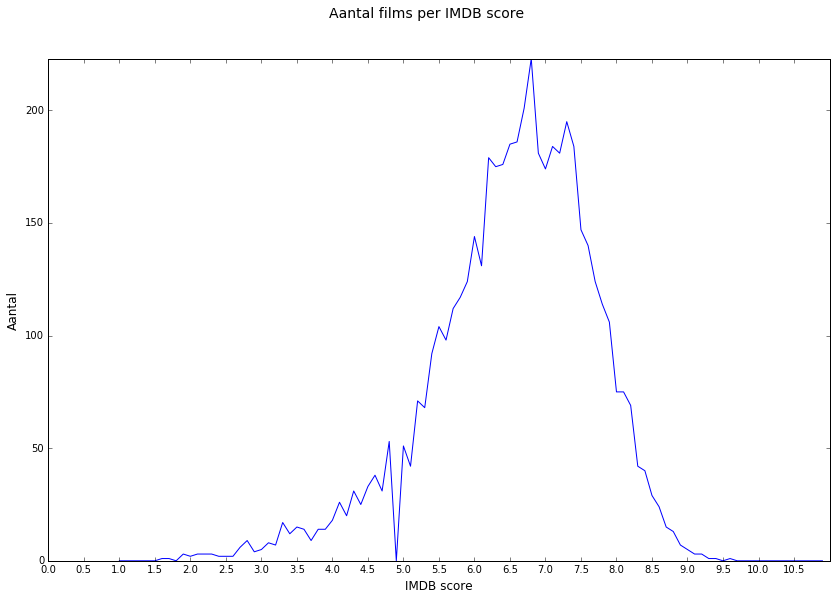

In [14]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    # eerste index, want het zit in een array
    var1 = imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['movie_title']].count().values[0]
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Aantal films per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Aantal', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Movie likes - IMDB-score

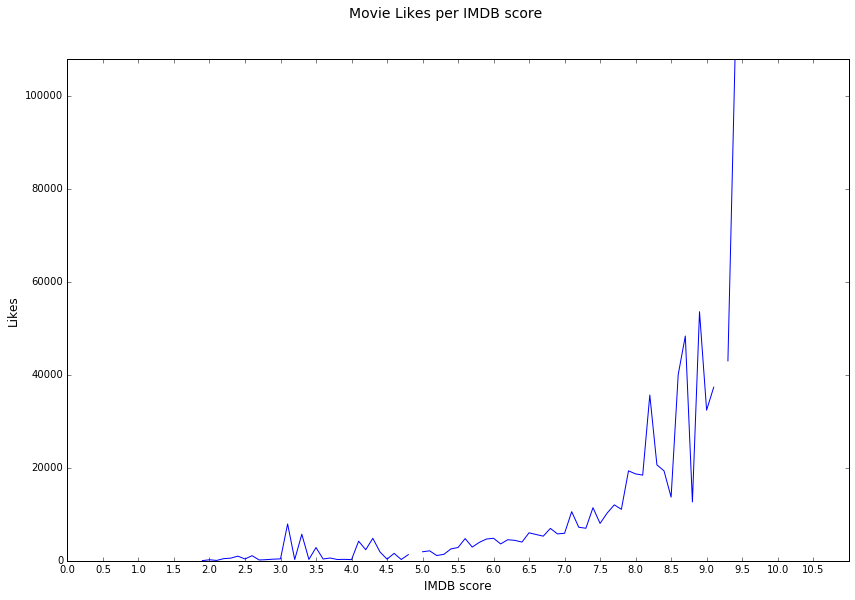

In [15]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de film niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Movie Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Avg Director likes - IMDB-score

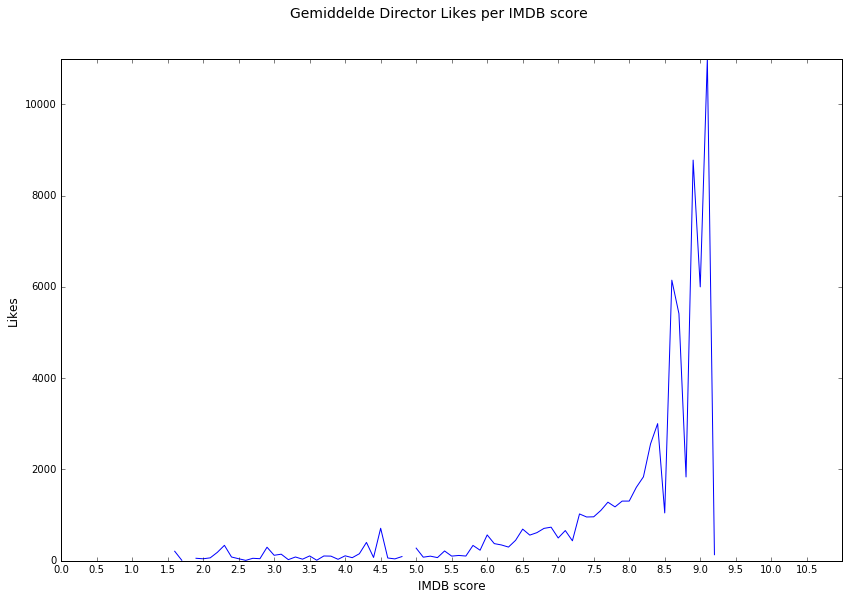

In [16]:
likes = []
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['director_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de director niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Gemiddelde Director Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Correlatie Avg Actors likes - IMDB-score

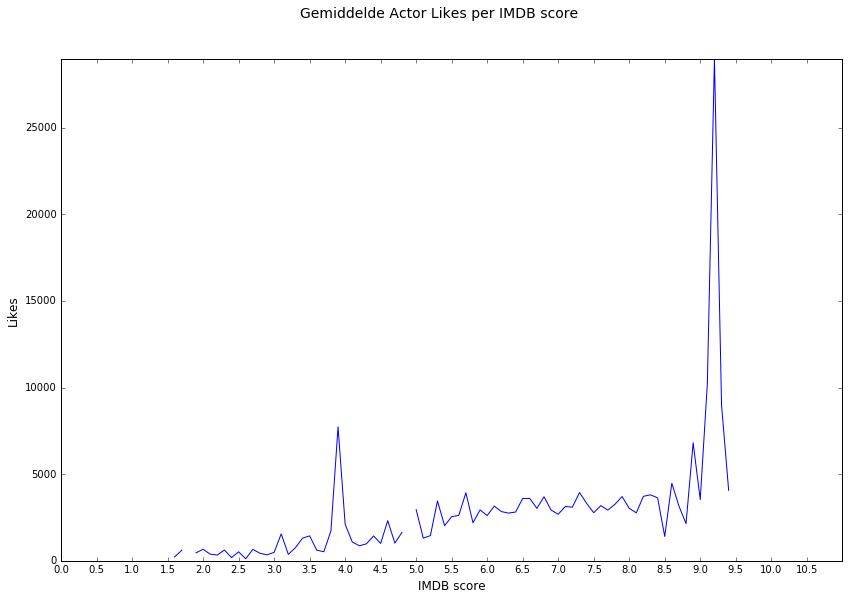

In [17]:
x_axis = []
y_axis = []

interval = 1

for i in range (1, 101):
    var1 = (imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_1_facebook_likes']].mean().values +
    imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_2_facebook_likes']].mean().values +
    imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - 0.1)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_3_facebook_likes']].mean().values) / 3
    
    #als de likes 0 zijn gaan we ervan uit dat de acteur(s) niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Gemiddelde Actor Likes per IMDB score', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis)
plt.axis([0, 11, 0, m])

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Likes - IMDB score

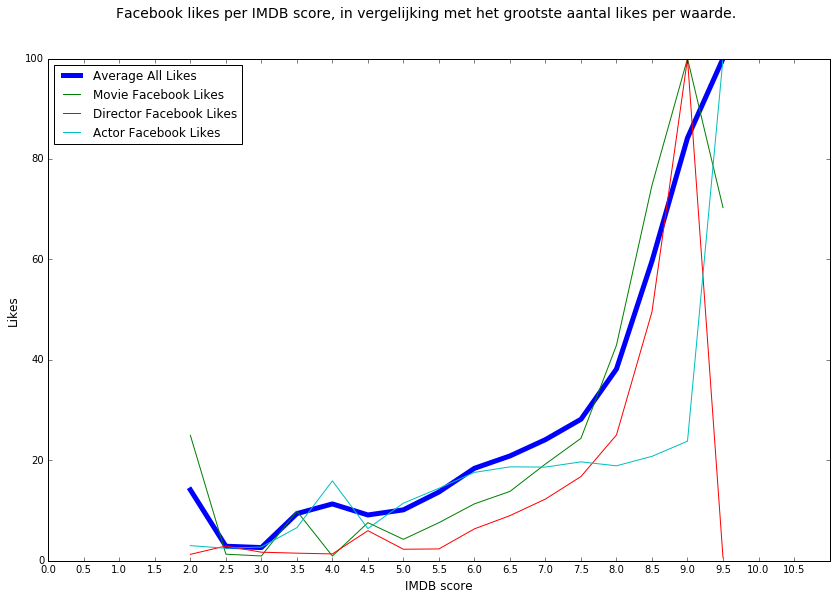

In [18]:
x_axis = []
actorLikes = []
directorLikes = []
movieLikes = []
average = []

ranges = 0.5
interval = 0



for i in range (1, 51):
    actor = (imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - ranges)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_1_facebook_likes']].mean().values +
    imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - ranges)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_2_facebook_likes']].mean().values +
    imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - ranges)) & 
        (imdbFrame['imdb_score'] <= interval)][['actor_3_facebook_likes']].mean().values) / 3
        
    actorLikes.append(checkNumber(actor))
    
    director = imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - ranges)) & 
        (imdbFrame['imdb_score'] <= interval)][['director_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    directorLikes.append(checkNumber(director))
    
    movie = imdbFrame.loc[(imdbFrame['imdb_score'] > (interval - ranges)) & 
        (imdbFrame['imdb_score'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    movieLikes.append(checkNumber(movie))
    
    var = checkNan(actor) + checkNan(director) + checkNan(movie) / 3
    if var != 0:
        average.append(var)
    else:
        average.append(None)
    
    x_axis.append(interval)
    
    interval += ranges

actorLikes = toPercent(actorLikes)
directorLikes = toPercent(directorLikes)
movieLikes = toPercent(movieLikes)
average = toPercent(average)

fig = plt.figure(figsize=(14,9))
fig.suptitle('Facebook likes per IMDB score, in vergelijking met het grootste aantal likes per waarde.', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('IMDB score', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)

plt.plot(x_axis, average, lw=5)
plt.plot(x_axis, movieLikes)
plt.plot(x_axis, directorLikes)
plt.plot(x_axis, actorLikes)

plt.axis([0, 11, 0, 100])
plt.legend(['Average All Likes', 'Movie Facebook Likes', 'Director Facebook Likes', 'Actor Facebook Likes'], loc='upper left')

plt.xticks(np.arange(0, 11, 0.5))

plt.show()

# Movie Likes - Review Rating

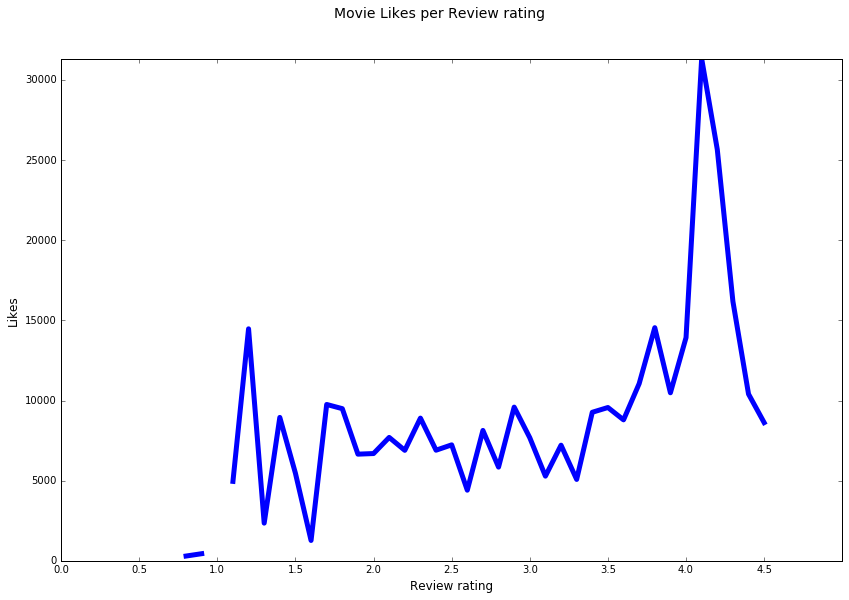

In [19]:
data = mergeFrame[['rating', 'movie_title', 'movie_facebook_likes']].groupby('movie_title').mean()
#print data

likes = []
x_axis = []
y_axis = []

interval = 0

for i in range (1, 101):
    var1 = data.loc[(data['rating'] > (interval - 0.1)) & 
        (data['rating'] <= interval)][['movie_facebook_likes']].mean().reset_index(
        name='average')[['average']].values
    
    #als de likes 0 zijn gaan we ervan uit dat de film niet op facebook staat
    if (math.isnan(var1)) | (var1 == 0):
        var1 = None
        
    y_axis.append(var1)
    x_axis.append(interval)
    
    interval += 0.1

m = (max(y_axis))

fig = plt.figure(figsize=(14,9))
fig.suptitle('Movie Likes per Review rating', fontsize = 14)

ax = fig.add_subplot(111)
ax.set_xlabel('Review rating', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
plt.plot(x_axis, y_axis, lw=5)
plt.axis([0, 5, 0, m])

plt.xticks(np.arange(0, 5, 0.5))

plt.show()